In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.shape

(200, 4)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

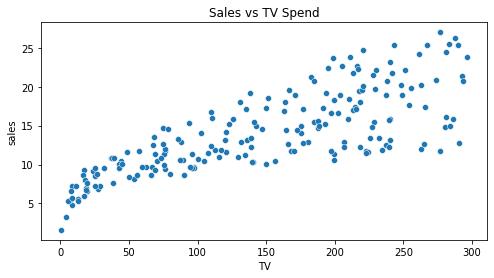

In [8]:
plt.figure(figsize = (8,4))
sns.scatterplot(data=df, x='TV',y='sales')
plt.title('Sales vs TV Spend')
plt.show()

**We see that there is a good strong linear relationship between Sales and TV Spend**

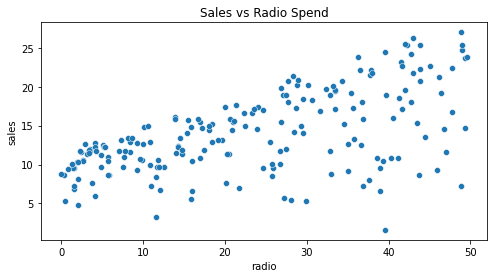

In [9]:
#Code Here: Plot the relationship between Sales and Radio Spend
plt.figure(figsize = (8,4))
sns.scatterplot(data=df, x='radio',y='sales')
plt.title('Sales vs Radio Spend')
plt.show()

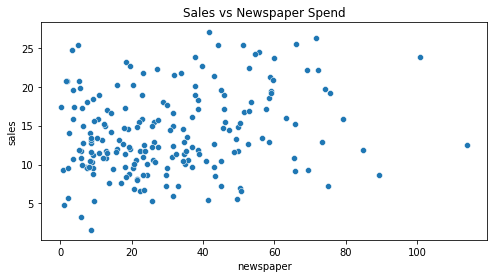

In [10]:
#Code Here: Plot the relationship between Sales and Newspaper Spend
plt.figure(figsize = (8,4))
sns.scatterplot(data=df, x='newspaper',y='sales')
plt.title('Sales vs Newspaper Spend')
plt.show()

In [11]:
# So now let us try to build a linear model. We will import the statsmodels library
# We are using the Statsmodels library for Ordinary Least Squares Regression
import statsmodels.formula.api as smf

In [12]:
# Code Here
# Statsmodels provides the capability to define the model as a formula - Sales ~ TV
# Create a model that maps the relationship between sales and tv spend
# y ~ x -> Simple Linear Regression
sm_sales_tv_model = smf.ols(formula = 'sales ~ TV', data=df).fit()

In [13]:
# Code here
# Observe the summary of the model
# Sales = 0.0475*TV+7.0326
print(sm_sales_tv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        14:02:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [14]:
# Code Here
# Build a model that includes TV and Radio...We will observe if it gives a better
# prediction
sm_sales_tv_radio_model = smf.ols(formula = 'sales ~ TV + radio', data=df).fit()

In [15]:
# Code here
# Print the summary of the model that models Sales ~ TV+ Radio
# sales = 0.0458*TV + 0.188*radio + 2.9211
print(sm_sales_tv_radio_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           4.83e-98
Time:                        14:02:59   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [16]:
# Code here
# Build a model that includes TV, Radio and Newspaper... We will observe if it improves
# predictions
sm_sales_tv_radio_np_model = smf.ols(formula = "sales ~ TV + radio + newspaper", data=df).fit()

In [17]:
# Code Here
# Print Model Summary and see the output
print(sm_sales_tv_radio_np_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.58e-96
Time:                        14:02:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [18]:
# Code here
# Make predictions and name the variable as y_predict
y_pred = sm_sales_tv_radio_model.predict(df)

In [19]:
y_pred[0:5]

0    20.555465
1    12.345362
2    12.337018
3    17.617116
4    13.223908
dtype: float64

In [20]:
y_tv_pred = sm_sales_tv_model.predict(df)

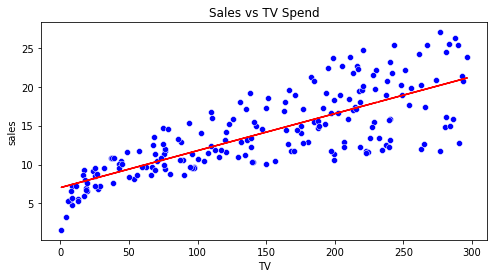

In [21]:
plt.figure(figsize = (8,4))
sns.scatterplot(data=df, x='TV',y='sales', color='blue')
plt.plot(df['TV'], y_tv_pred, color='red')
plt.title('Sales vs TV Spend')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
# Code Here
# Calculate Root Mean Squared Error
## In SL Lab
print(f"Mean Squared Error {mean_squared_error(y_pred = y_pred, y_true = df['sales'])}")
print(f"Root Mean Squared Error {mean_squared_error(y_pred = y_pred, y_true = df['sales'])}")
print(f"Mean Absolute Error {mean_absolute_error(y_pred = y_pred, y_true = df['sales'])}")

Mean Squared Error 2.784569900338091
Root Mean Squared Error 2.784569900338091
Mean Absolute Error 1.2537471644234015


# <strong> Machine Learning Process </strong>

In [25]:
# Code here
# Import Train Test Split function
from sklearn.model_selection import train_test_split

In [26]:
# Code here
# Create the Training Set and Test Set
# X_train, X_test, y_train and y_test
X = df.drop(['sales'],axis=1)
y = df[['sales']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state=12345)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


In [28]:
# Code here
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [29]:
# Code here: Instantiate the StandardScaler
scaler = StandardScaler()

In [30]:
# Code here: Scale X_train and X_test. Variables to be used are - X_train_sc, X_test_sc
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [31]:
print(X_train_sc.shape, X_test_sc.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


In [32]:
# Code Here
# Import the LinearRegression Class
from sklearn.linear_model import LinearRegression

In [33]:
# Code here
# Create the Linear Regression Model (sk_model) and fit the model on the training set
sk_model = LinearRegression()
sk_model.fit(X_train_sc, y_train)

LinearRegression()

In [34]:
sk_model.coef_, sk_model.intercept_

(array([[ 3.68295306,  2.74667832, -0.18220943]]), array([14.204375]))

In [35]:
y_tr_pred = sk_model.predict(X_train_sc)

In [36]:
y_ts_pred = sk_model.predict(X_test_sc)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score #, root_mean_squared_error -> colab

In [40]:
rmse_tr = mean_squared_error(y_true=y_train,y_pred = y_tr_pred)
print(f"Error on Training Dataset {rmse_tr}")

Error on Training Dataset 2.183324236984493


In [45]:
rmse_ts = mean_squared_error(y_true=y_test,y_pred = y_ts_pred)
print(f"Error on Test Dataset {rmse_ts}")

Error on Test Dataset 5.4312755260781795


In [46]:
r2_score_tr, r2_score_ts = r2_score(y_true=y_train,y_pred = y_tr_pred), r2_score(y_true=y_test,y_pred = y_ts_pred)

print(f"Training Set R2 value {r2_score_tr} and Test Set R2 value {r2_score_ts}")

Training Set R2 value 0.9087107110681755 and Test Set R2 value 0.8610961612574065


In [47]:
print(y_train[0:5], y_tr_pred[0:5])

     sales
70    18.3
154   15.6
194   17.3
33    17.4
104   20.7 [[17.7218636 ]
 [15.66901643]
 [16.76811311]
 [18.98388296]
 [20.44509484]]


In [48]:
print(y_test[0:5], y_ts_pred[0:5])

     sales
52    22.6
157   10.1
135   11.6
140   10.9
56     5.5 [[20.58935664]
 [10.09590671]
 [14.42381891]
 [ 9.79585535]
 [ 8.73225619]]


In [49]:
def check_overfitting(rmse_tr, rmse_ts, r2_tr, r2_ts):
    # Check for overfitting or underfitting
    text = ""
    if rmse_tr < rmse_ts or r2_tr > r2_ts:
        if abs(r2_tr - r2_ts) > 0.1:
            text= "Model may be overfitting to the training data."
        else:
            text= "Model performs reasonably well but check for slight overfitting."
    elif rmse_tr > rmse_ts and r2_tr < r2_ts:
        text = "Model may be underfitting, consider increasing model complexity."
    else:
        text = "Model has a balanced fit on both training and testing datasets."
    return text

In [50]:
check_overfitting(rmse_tr, rmse_ts,r2_score_tr, r2_score_ts)

'Model performs reasonably well but check for slight overfitting.'

## <strong> POLYNOMIAL REGRESSION </strong>

In [51]:
np.random.seed(12345)
X_poly = np.random.randint(0,100,5000).reshape(-1,1)
const = np.random.randint(0,100)
y_poly = np.power(X_poly,2)+ const
print(f"Constant is {const}")

Constant is 79


In [52]:
# y = x2 + c

In [53]:
X_poly[0:5], y_poly[0:5], 98*98+79

(array([[98],
        [29],
        [ 1],
        [36],
        [41]]),
 array([[9683],
        [ 920],
        [  80],
        [1375],
        [1760]]),
 9683)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree=2)

In [55]:
X_poly_tr = poly_f.fit_transform(X_poly)

In [56]:
new_df = pd.DataFrame(X_poly_tr, columns = ['x0','x1','x2'])
new_df['y'] = y_poly
#new_df['y'] = y_poly

In [57]:
new_df.head()

,x0,x1,x2,y
0,1.0,98.0,9604.0,9683
1,1.0,29.0,841.0,920
2,1.0,1.0,1.0,80
3,1.0,36.0,1296.0,1375
4,1.0,41.0,1681.0,1760


In [58]:
poly_model = smf.ols(formula = 'y ~ x1 + x2', data=new_df).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.850e+32
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:04:00   Log-Likelihood:             1.2153e+05
No. Observations:                5000   AIC:                        -2.430e+05
Df Residuals:                    4997   BIC:                        -2.430e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.0000   2.75e-13   2.87e+14      0.0

## <strong> LASSO REGRESSION </strong>

In [59]:
from sklearn.linear_model import Lasso

In [60]:
sk_l1_model = Lasso(alpha=0.95)
sk_l1_model.fit(X_train_sc, y_train)

Lasso(alpha=0.95)

In [61]:
y_tr_pred_l1 = sk_l1_model.predict(X_train_sc)
y_ts_pred_l1 = sk_l1_model.predict(X_test_sc)

In [63]:
rmse_tr_l1 = mean_squared_error(y_true=y_train,y_pred = y_tr_pred_l1)
rmse_ts_l1 = mean_squared_error(y_true=y_test,y_pred = y_ts_pred_l1)
r2_tr_l1 = r2_score(y_true=y_train,y_pred = y_tr_pred_l1)
r2_ts_l1 = r2_score(y_true=y_test,y_pred = y_ts_pred_l1)
print(f"Training RMSE {rmse_tr_l1}, Training R2 { r2_tr_l1}, Test RMSE {rmse_ts_l1} and Test R2 {r2_ts_l1}")

Training RMSE 3.9424397337759487, Training R2 0.8351584643927836, Test RMSE 8.994337593866133 and Test R2 0.7699715264423423


In [64]:
check_overfitting(rmse_tr_l1, rmse_ts_l1, r2_tr_l1, r2_ts_l1)

'Model performs reasonably well but check for slight overfitting.'

In [65]:
sk_l1_model.coef_, sk_l1_model.intercept_

(array([2.7790149 , 1.77788102, 0.        ]), array([14.204375]))

## <strong> RIDGE REGRESSION </strong>

In [66]:
from sklearn.linear_model import Ridge

In [67]:
sk_l2_model = Ridge(alpha=1)
sk_l2_model.fit(X_train_sc, y_train)

Ridge(alpha=1)

In [68]:
y_tr_pred_l2 = sk_l2_model.predict(X_train_sc)
y_ts_pred_l2 = sk_l2_model.predict(X_test_sc)

In [70]:
rmse_tr_l2 = mean_squared_error(y_true=y_train,y_pred = y_tr_pred_l2)
# for colab users - rmse_tr_l2 = root_mean_squared_error(y_true=y_train,y_pred = y_tr_pred_l2)

rmse_ts_l2 = mean_squared_error(y_true=y_test,y_pred = y_ts_pred_l2)
r2_tr_l2 = r2_score(y_true=y_train,y_pred = y_tr_pred_l2)
r2_ts_l2 = r2_score(y_true=y_test,y_pred = y_ts_pred_l2)
print(f"Training RMSE {rmse_tr_l2}, Training R2 { r2_tr_l2}, Test RMSE {rmse_ts_l2} and Test R2 {r2_ts_l2}")

Training RMSE 2.1841434767137926, Training R2 0.9086764569656076, Test RMSE 5.4606258422421 and Test R2 0.8603455325029081


In [71]:
check_overfitting(rmse_tr_l2, rmse_ts_l2, r2_tr_l2, r2_ts_l2)

'Model performs reasonably well but check for slight overfitting.'

In [72]:
sk_l2_model.coef_, sk_l2_model.intercept_

(array([ 3.66099721,  2.72851418, -0.17573987]), array([14.204375]))

## <strong> ELASTICNET REGRESSION </strong>

In [73]:
from sklearn.linear_model import ElasticNet

In [74]:
sk_l1l2_model = ElasticNet(l1_ratio = 0.9)
sk_l1l2_model.fit(X_train_sc, y_train)

ElasticNet(l1_ratio=0.9)

In [75]:
y_tr_pred_l1l2 = sk_l1l2_model.predict(X_train_sc)
y_ts_pred_l1l2 = sk_l1l2_model.predict(X_test_sc)

In [77]:
rmse_tr_l1l2 = mean_squared_error(y_true=y_train,y_pred = y_tr_pred_l1l2)
rmse_ts_l1l2 = mean_squared_error(y_true=y_test,y_pred = y_ts_pred_l1l2)
r2_tr_l1l2 = r2_score(y_true=y_train,y_pred = y_tr_pred_l1l2)
r2_ts_l1l2 = r2_score(y_true=y_test,y_pred = y_ts_pred_l1l2)
print(f"Training RMSE {rmse_tr_l1l2}, Training R2 { r2_tr_l1l2}, Test RMSE {rmse_ts_l1l2} and Test R2 {r2_ts_l1l2}")

Training RMSE 4.5880844759889055, Training R2 0.8081627262331607, Test RMSE 10.158598532115168 and Test R2 0.7401957743479499


In [78]:
check_overfitting(rmse_tr_l1l2, rmse_ts_l1l2, r2_tr_l1l2, r2_ts_l1l2)

'Model performs reasonably well but check for slight overfitting.'

In [79]:
sk_l1l2_model.coef_, sk_l1l2_model.intercept_

(array([2.57613023, 1.66977747, 0.        ]), array([14.204375]))